# <center><font color='MediumSeaGreen'>Desafío - Clasificación desde la econometría </font><center>

### <center><b> Bárbara Pérez </b><center>

___

## <font color='MediumSeaGreen'>Descripción</font>

En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:

● <span style='background:gainsboro'><font color='dimgray'>sbp</font></span> : Presión Sanguínea Sistólica.

● <span style='background:gainsboro'><font color='dimgray'>tobacco</font></span> : Promedio tabaco consumido por día.

● <span style='background:gainsboro'><font color='dimgray'>ldl</font></span> : Lipoproteína de baja densidad.

● <span style='background:gainsboro'><font color='dimgray'>adiposity</font></span> : Adiposidad.

● <span style='background:gainsboro'><font color='dimgray'>famhist</font></span> : Antecedentes familiares de enfermedades cardiácas. (Binaria).

● <span style='background:gainsboro'><font color='dimgray'>types</font></span> : Personalidad tipo A.

● <span style='background:gainsboro'><font color='dimgray'>obesity</font></span> : Obesidad.

● <span style='background:gainsboro'><font color='dimgray'>alcohol</font></span> : Consumo actual de alcohol.

● <span style='background:gainsboro'><font color='dimgray'>age</font></span> : edad.

● <span style='background:gainsboro'><font color='dimgray'>chd</font></span> : Enfermedad coronaria. (dummy).



_____

## <font color='MediumSeaGreen'>Desafío 1: Preparación del ambiente de trabajo</font> 

● Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).

● Importe el archivo southafricanheart.csv que se encuentra dentro del material de apoyo.

● Realice una descripción del set importado mostrando:

- lista con los nombres de variables importadas
   
- un análisis descriptivo mediante <span style='background:gainsboro'><font color='dimgray'>.describe()</font></span>
   
- Distribución de categorías para las variables <span style='background:gainsboro'><font color='dimgray'>famhist</font></span> y <span style='background:gainsboro'><font color='dimgray'>chd</font></span>.

In [1]:
#importamos las librerías de siempre

#manipulación de datos 
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#modelación econométrica
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures as polynom
from sklearn.linear_model import LinearRegression as linreg
from sklearn.pipeline import make_pipeline


plt.style.use('seaborn-whitegrid')


import warnings
warnings.filterwarnings("ignore")

In [2]:
#importamos el dataframe
df = pd.read_csv('southafricanheart.csv')

In [3]:
#revisamos el dataframe
df.head()

,Unnamed: 0,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
#informacion donde aparece lista con los nombres de variables importadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [6]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [7]:
#análisis descriptivo mediante .describe()
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


________

## <font color='MediumSeaGreen'>Desafío 2</font> 

A continuación se presenta el siguiente modelo a estimar:
    
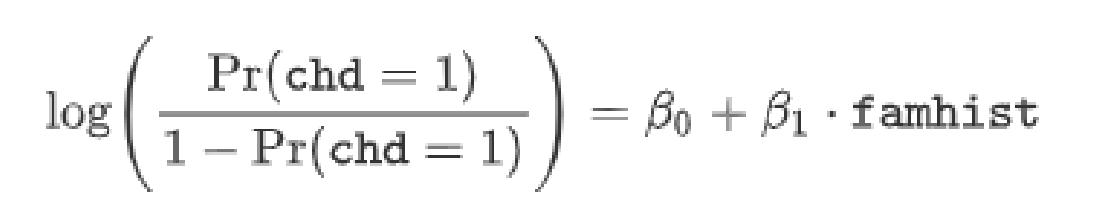

Para ello ejecute los siguientes pasos:

1. Recodifique <span style='background:gainsboro'><font color='dimgray'>famhist</font></span> a dummy, asignando 1 a la categoría minoritaria.
2. Utilice <span style='background:gainsboro'><font color='dimgray'>smf.logit</font></span> para estimar el modelo.
3. Implemente una función <span style='background:gainsboro'><font color='dimgray'>inverse_logit</font></span> que realice el mapeo de log-odds a probabilidad.
4. Con el modelo estimado, responda lo siguiente:
 - ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
 - ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
 - ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?
 - Replique el modelo con <span style='background:gainsboro'><font color='dimgray'>smf.ols</font></span> y comente las similitudes entre los coeficientes estimados.
**Tip**: Utilice β/4

In [8]:
#revisamos la columna 'famhist'
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [9]:
#binarizamos la columna 'famhist' por la clase menos frecuente
df['famhist_p'] = np.where(df['famhist'] == 'Present', 1, 0)

**2.-Utilice smf.logit para estimar el modelo.**

In [10]:
#creamos y entrenamos el modelo logistico 
m1_logit = smf.logit('chd ~ famhist_p', df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


**3.-Implemente una función inverse_logit que realice el mapeo de log-odds a probabilidad.**

In [11]:
#definimos la funcion concise_summary en base a la lectura
def concise_summary(mod, print_fit=True):
    #guardamos los parámetros asociados a estadísticas de ajuste
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:],
    'Value': mod.summary2().tables[0][3][2:]})
    # guardamos los parámetros estimados por cada regresor.
    estimates = pd.DataFrame(mod.summary2().tables[1])
    # imprimir fit es opcional
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
        print("\nPoint Estimates\n\n", estimates)

In [12]:
#utilizamos smf.logit para estimar el modelo
concise_summary(m1_logit)


Goodness of Fit statistics
         Statistics       Value
2             BIC:    574.1655
3  Log-Likelihood:     -280.95
4         LL-Null:     -298.05
5     LLR p-value:  4.9371e-09
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
Intercept -1.168993  0.143106 -8.168713  3.116957e-16 -1.449476 -0.888510
famhist_p  1.168993  0.203255  5.751355  8.853123e-09  0.770620  1.567366


In [13]:
#creamos la funcion inverse_logit
def inverse_logit(x):
    return 1 / (1+np.exp(-x))

**4.Con el modelo estimado, responda lo siguiente:**

**¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?**

In [14]:
#obtenemos la probabilidad de un individuo sin antecedentes familiares
isaf = round(inverse_logit(-1.168993), 4)
isaf

0.237

*La probabilidad de un individuo sin antecedentes familiares de obtener una enfermedad coronaria es de  23.7%*

**¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?**

In [15]:
#obtenemos la probabilidad de un individuo con antencentes familiares
icaf = round(inverse_logit(-1.168993+1.168993), 4)
icaf

0.5

*La probabilidad de un individuo con antecedentes familiares de obtener una enfermedad coronaria es de 50%*

**¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?**

In [16]:
#obtenemos la diferencia entre un individuo con y uno sin antecedentes familiares
icaf - isaf

0.263

*La diferencia en la probabilidad de obtener una enfermedad coronariaentre entre un individuo con antecedentes familiares y otro sin antecedentes familiares es de 26.3%*

**Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.**

In [17]:
#creamos el modelo con smf.ols
m1_ols = smf.ols('chd ~ famhist_p', df).fit()

In [18]:
concise_summary(m1_ols)


Goodness of Fit statistics
             Statistics     Value
2                 BIC:  601.4437
3      Log-Likelihood:   -294.59
4         F-statistic:     36.86
5  Prob (F-statistic):  2.66e-09
6               Scale:   0.21050

Point Estimates

               Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept  0.237037  0.027922  8.489319  2.886599e-16  0.182167  0.291907
famhist_p  0.262963  0.043313  6.071289  2.657629e-09  0.177848  0.348078


In [19]:
#sumamos el intercepto y famhist_p
probabilidad = 0.237037 + 0.262963
probabilidad

0.5

In [20]:
round(probabilidad, 4)

0.5

*En ambos modelos la probabilidad de un individuo con antecedentes familiares de obtener una enfermedad coronaria es aproximadamente de 50%*

In [21]:
#Aplicamos la regla beta/4
1.168993/4

0.29224825

*Se observa que aplicando 𝛽/4  al coeficiente de 'famhist_p', el resultado es simmilar al que se obtiene en el modelo smf.ols*

__________

## <font color='MediumSeaGreen'>Desafío 3: Estimación completa</font> 

Implemente un modelo con la siguiente forma:
$$ \log \left(\frac{Pr(chd=1)}{1-Pr(chd=1)}\right) = \beta_{0} + \sum_{j=1}^{N} \beta_{j} \times X $$

● Depure el modelo manteniendo las variables con significancia estadística al 5%.

● Compare los estadísticos de bondad de ajuste entre ambos.

● Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [22]:
#obtenemos las variables para clasificacion
columnas = list(df.columns)
columnas.remove('chd')
columnas.remove('famhist')
variables_sumadas = "+".join(columnas)
variables_sumadas

'sbp+tobacco+ldl+adiposity+typea+obesity+alcohol+age+famhist_p'

In [23]:
#creamos y entrenamos el modelo saturado
m2_logit = smf.logit('chd ~ '+variables_sumadas, df).fit()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


### Depure el modelo manteniendo las variables con significancia estadística al 5%

In [24]:
#revisamos el modelo saturado
m2_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2022-07-13 02:34 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.1507    1.3083  -4.7015  0.0000  -8.7149  -3.5866
sbp            0.0065    0.0057   1.1350  0.2564  -0.0047   0.0177
tobacco        0.0794    0.0266   2.9838  0.0028   0.0272   0.1315
ldl            0.1739    0.0597   2.9152  0.0036   0.0570   0.2909
adiposity      0.0186    0.0293   0.6346  0.5257  -0.0388   0.0760
typea          0.0396    0.0123   3.2138  0.0013   0.0154   0.0637
obesity       -0.0629    0.0442  -1.4218  0.1551  -0.1496   0.0238
alcohol        0.0001    0.0045   0.0271  0.9784  -0.0087   0.0089
age            0.0452    0.0121   3.7285  0.0002   0.0215   0.0690
famhist_p      0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
=================================================================

"""

In [25]:
#depuramos por variablas con significancia del 95%
variables_significativas = 'tobacco + ldl + typea + age + famhist_p'
m2_logit_depurado = smf.logit('chd ~ '+variables_significativas, df).fit()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


In [26]:
m2_logit_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2022-07-13 02:34 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
famhist_p      0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
=================================================================

"""

### Compare los estadísticos de bondad de ajuste entre ambos.

- Ambos modelos poseen un Pseudo R-squared similar, con una diferencia de: 0.005, lo que no es significativo

- Se observa que los estadísticos de bondad (Pseudo R-squared:) de ambos modelos son muy similares (explican la varianza del modelo en aproximadamente un 20%), y solo se diferencian en 0.006. El modelo depurado presenta coeficientes similares de las variables, que aportan a tener una mayor probabilida de contraer enfermedades coronarios, y es de aplicación mas general.

### Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [27]:
#obtenemos los coeficientes por variable
coeficientes = m2_logit_depurado.params

In [28]:
#revisamos los betas
m2_logit_depurado.params

Intercept   -6.446445
tobacco      0.080375
ldl          0.161992
typea        0.037115
age          0.050460
famhist_p    0.908175
dtype: float64

In [29]:
#aplicamos el log inverso a los coeficientes
coeficientes.map(lambda x: round(inverse_logit(m2_logit_depurado.params['Intercept'] + x), 4))

Intercept    0.0000
tobacco      0.0017
ldl          0.0019
typea        0.0016
age          0.0017
famhist_p    0.0039
dtype: float64

Se observa que en todas las variables la adición de una unidad incrementa en aproximadamente 0.17% la probabilida de contraer una enfermedad coronaria por cada unidad adicional, con la salvedad de la presencia de antecedentes familiares, que de existir incrementan la probabilidad en 0.39%

__________

## <font color='MediumSeaGreen'>Desafío 4: Estimación de perfiles</font> 

A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con <span style='background:gainsboro'><font color='dimgray'>inverse_logit</font></span>. Los perfiles a estimar son los siguientes:

● La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

● La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, **manteniendo todas las demás características constantes**.

● La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, **manteniendo todas las demás características constantes**.

In [30]:
#obtenemos los valores del individuo promedio para las variables continuas significativas
#consideraremos la probabilidad de corte para estimar la ocurrencia normal de famhist_p como > 50%
medias = {
    'tobacco': df['tobacco'].mean(),
    'ldl' : df['ldl'].mean(),
    'typea': df['typea'].mean(),
    'age': df['age'].mean(),
    'famhist_p': 1 if df['famhist_p'].value_counts('%')[1] > 0.5 else 0
    
}

In [31]:
medias

{'tobacco': 3.635649350649351,
 'ldl': 4.740324675324675,
 'typea': 53.103896103896105,
 'age': 42.816017316017316,
 'famhist_p': 0}

In [32]:
#definimos nuestra funcion predictora. 
#no obstante el individuo promedio no tiene antecedentes familiares, consereraremos ambos casos
def predice_por_individuo(modelo_logit, medias):
    probabilidad_chd_individio_con_famhist_p = round(inverse_logit(
        + modelo_logit.params['Intercept']
        + (modelo_logit.params['tobacco'] * medias['tobacco'])
        + (modelo_logit.params['ldl'] * medias['ldl'])
        + (modelo_logit.params['typea'] * medias['typea'])
        + (modelo_logit.params['age'] * medias['age'])
        + (modelo_logit.params['famhist_p'] * 1)  
    ), 4)
    probabilidad_chd_individio_sin_famhist_p = round(inverse_logit(
        + modelo_logit.params['Intercept']
        + (modelo_logit.params['tobacco'] * medias['tobacco'])
        + (modelo_logit.params['ldl'] * medias['ldl'])
        + (modelo_logit.params['typea'] * medias['typea'])
        + (modelo_logit.params['age'] * medias['age'])
        + (modelo_logit.params['famhist_p'] * 0)  
    ),4)
    print("Probabilidad de chd para individuo promedio")
    print(f"\033[1mCon\033[0m historial familiar {probabilidad_chd_individio_con_famhist_p}")
    print(f"\033[1mSin\033[0m historial familiar {probabilidad_chd_individio_sin_famhist_p}")

### La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

In [33]:
predice_por_individuo(m2_logit_depurado, medias)

Probabilidad de chd para individuo promedio
Con historial familiar 0.4142
Sin historial familiar 0.2219


La probabilidad de tener una enfermedad coronaria de un individuo con características similares a la muestra es de:
* 22.19% sin antecedentes familiares
* 41.42% con antecedentes familiares
    

### La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [34]:
#obtenemos el valor mas alto de ldl de la muestra
medias['ldl'] = df['ldl'].max()
predice_por_individuo(m2_logit_depurado, medias)

Probabilidad de chd para individuo promedio
Con historial familiar 0.7972
Sin historial familiar 0.6132


La probabilidad de tener una enfermedad coronaria de un individuo con características similares a la muestra y ALTOS grados de ldl de:
* 61.32% si no tiene antecedentes familiares
* 79.72% si tiene antecedentes familiares

### La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad

In [35]:
#obtenemos el valor mas bajo de ldl de la muestra
medias['ldl'] = df['ldl'].min()
predice_por_individuo(m2_logit_depurado, medias)

Probabilidad de chd para individuo promedio
Con historial familiar 0.2777
Sin historial familiar 0.1342


La probabilidad de tener una enfermedad coronaria de un individuo con características similares a la muestra y BAJOS grados de ldl de:
* 13.42% si no tiene antecedentes familiares
* 27.77% si tiene antecedentes familiares

________